In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

c:\Users\kyeongtae\Anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
c:\Users\kyeongtae\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.FB5AE2TYXYH2IJRDKGDGQ3XBKLKTF43H.gfortran-win_amd64.dll
c:\Users\kyeongtae\Anaconda3\lib\site-packages\numpy\.libs\libopenblas.XWYDX2IKJW2NMTWSFYNGFUWKQU3LYTCZ.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
pd.read_csv('2019_weather.csv', encoding = 'cp949')

FileNotFoundError: [Errno 2] No such file or directory: '2019_weather.csv'

In [4]:
pd.read_csv('peak_2018.csv')

,date,temp,rain,humid,snow
0,2018-01-01,-0.292308,0.0,34.461538,0.0
1,2018-01-02,-0.638462,0.0,40.846154,0.0
2,2018-01-03,-3.930769,0.0,37.615385,0.0
3,2018-01-04,-4.307692,0.0,40.076923,0.0
4,2018-01-05,-1.715385,0.0,45.230769,0.0
...,...,...,...,...,...
360,2018-12-27,-9.453846,0.0,20.769231,0.0
361,2018-12-28,-10.446154,0.0,30.307692,0.0
362,2018-12-29,-6.730769,0.0,23.538462,0.0
363,2018-12-30,-5.769231,0.0,31.615385,0.0


In [5]:
pd.read_csv('traindata.csv')

,date,광진구,동대문구,성동구,중랑구
0,2018-01-01,0.592,0.368,0.580,0.162
1,2018-01-02,0.840,0.614,1.034,0.260
2,2018-01-03,0.828,0.576,0.952,0.288
3,2018-01-04,0.792,0.542,0.914,0.292
4,2018-01-05,0.818,0.602,0.994,0.308
...,...,...,...,...,...
1091,2020-12-27,3.528,2.604,3.258,2.038
1092,2020-12-28,4.542,3.588,4.506,2.480
1093,2020-12-29,3.694,3.054,3.222,2.118
1094,2020-12-30,2.366,1.812,2.012,1.174


In [3]:
import os
os.getcwd()

'd:\\Dropbox\\GitHub\\coding\\자료분석 및 실험\\code\\model'

In [4]:
train = pd.read_csv('../../data/traindata.csv')
train.set_index('date', inplace = True)

test = pd.read_csv('../../data/testdata.csv')
test.set_index('date', inplace = True)


In [5]:
train.loc[: ,'sum'] = train.sum(axis = 1)
test.loc[:, 'sum'] = test.sum(axis = 1)

In [6]:
train


,광진구,동대문구,성동구,중랑구,sum
date,,,,,
2018-01-01,0.592,0.368,0.580,0.162,1.702
2018-01-02,0.840,0.614,1.034,0.260,2.748
2018-01-03,0.828,0.576,0.952,0.288,2.644
2018-01-04,0.792,0.542,0.914,0.292,2.540
2018-01-05,0.818,0.602,0.994,0.308,2.722
...,...,...,...,...,...
2020-12-27,3.528,2.604,3.258,2.038,11.428
2020-12-28,4.542,3.588,4.506,2.480,15.116
2020-12-29,3.694,3.054,3.222,2.118,12.088


In [7]:
import plotly.express as px
px.line(train['sum'], title = '서울시 전체 따릉이 수요량')

In [8]:
# prophet 사용가능한 데이터 형태로 변경하기

train_prophet = train.reset_index()
train_prophet = train_prophet.loc[:, ['date', 'sum']]
train_prophet.rename(columns = {'date' : 'ds', 'sum' : 'y'}, inplace = True)

test_prophet = test.reset_index()
test_prophet = test_prophet.loc[:, ['date', 'sum']]
test_prophet.rename(columns = {'date' : 'ds', 'sum' : 'y'}, inplace = True)


In [19]:
train_prophet

,ds,y
0,2018-01-01,1.702
1,2018-01-02,2.748
2,2018-01-03,2.644
3,2018-01-04,2.540
4,2018-01-05,2.722
...,...,...
1091,2020-12-27,11.428
1092,2020-12-28,15.116
1093,2020-12-29,12.088
1094,2020-12-30,7.364


In [9]:
from prophet import Prophet

In [10]:
m = Prophet()
m.fit(train_prophet)

INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
c:\Users\kyeongtae\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [11]:
# predict

future = m.make_future_dataframe(periods = 365)
future.tail()

,ds
1456,2021-12-27
1457,2021-12-28
1458,2021-12-29
1459,2021-12-30
1460,2021-12-31


In [12]:
forecast = m.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail()

c:\Users\kyeongtae\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

c:\Users\kyeongtae\Anaconda3\lib\site-packages\prophet\forecaster.py:896: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



,ds,yhat,yhat_lower,yhat_upper
1456,2021-12-27,13.618536,7.463014,20.047115
1457,2021-12-28,14.453405,7.666252,21.112227
1458,2021-12-29,13.757289,7.134461,20.294810
1459,2021-12-30,14.020647,7.758046,20.571231
1460,2021-12-31,14.620368,8.235509,21.415997


In [13]:
# 예측에 사용되는 요소들
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

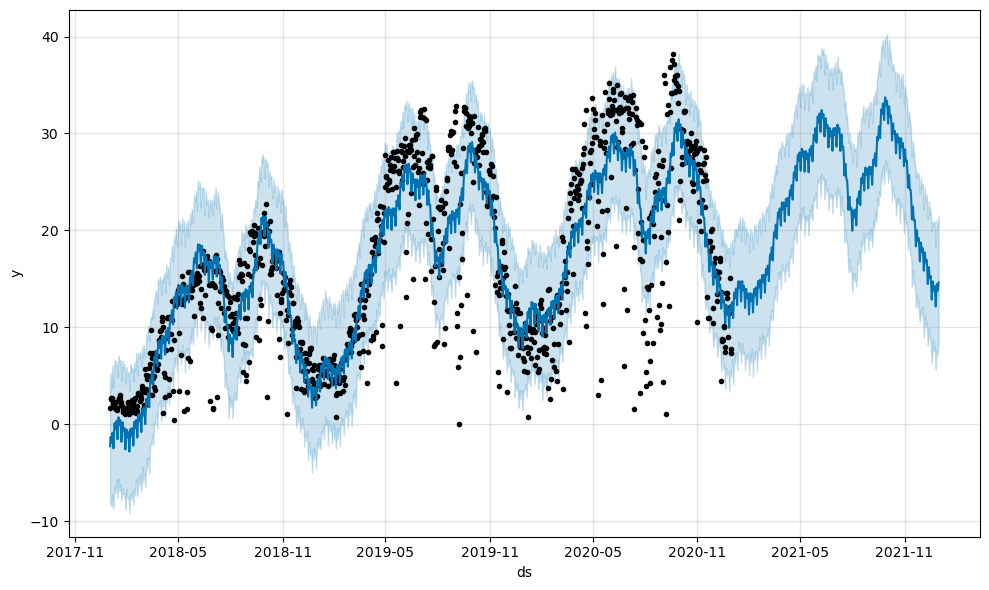

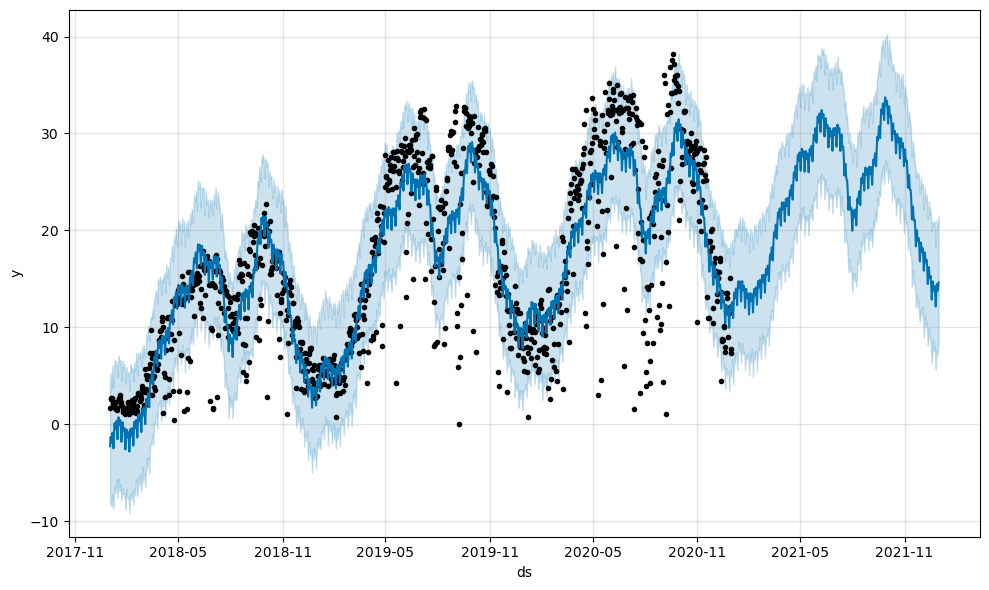

In [14]:
m.plot(forecast)

In [29]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2018-01-01,7.814494,-8.676425,4.010024,7.814494,7.814494,-10.060309,-10.060309,-10.060309,0.009378,0.009378,0.009378,-10.069687,-10.069687,-10.069687,0.0,0.0,0.0,-2.245815
1,2018-01-02,7.823018,-7.991989,4.955747,7.823018,7.823018,-9.106551,-9.106551,-9.106551,0.785460,0.785460,0.785460,-9.892011,-9.892011,-9.892011,0.0,0.0,0.0,-1.283533
2,2018-01-03,7.831541,-8.657858,4.294266,7.831541,7.831541,-9.701253,-9.701253,-9.701253,-0.000475,-0.000475,-0.000475,-9.700778,-9.700778,-9.700778,0.0,0.0,0.0,-1.869711
3,2018-01-04,7.840064,-7.888810,5.074958,7.840064,7.840064,-9.356131,-9.356131,-9.356131,0.144579,0.144579,0.144579,-9.500710,-9.500710,-9.500710,0.0,0.0,0.0,-1.516067
4,2018-01-05,7.848588,-7.512273,5.743300,7.848588,7.848588,-8.695714,-8.695714,-8.695714,0.600968,0.600968,0.600968,-9.296682,-9.296682,-9.296682,0.0,0.0,0.0,-0.847127
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1456,2021-12-27,24.338360,7.241155,20.612423,22.983727,25.731363,-10.605632,-10.605632,-10.605632,0.009378,0.009378,0.009378,-10.615010,-10.615010,-10.615010,0.0,0.0,0.0,13.732728
1457,2021-12-28,24.344704,8.093956,21.348299,22.981312,25.742467,-9.776982,-9.776982,-9.776982,0.785460,0.785460,0.785460,-10.562442,-10.562442,-10.562442,0.0,0.0,0.0,14.567722
1458,2021-12-29,24.351048,7.507414,19.779845,22.978898,25.754519,-10.479474,-10.479474,-10.479474,-0.000475,-0.000475,-0.000475,-10.478999,-10.478999,-10.478999,0.0,0.0,0.0,13.871573
1459,2021-12-30,24.357391,7.560307,21.324742,22.976483,25.767123,-10.222406,-10.222406,-10.222406,0.144579,0.144579,0.144579,-10.366985,-10.366985,-10.366985,0.0,0.0,0.0,14.134985


In [40]:
label = test_prophet['y']

from sklearn.metrics import mean_squared_error as mse

print(mse(label, pred))

79.95492522794103


In [39]:
pred = forecast['yhat'][-365 :]

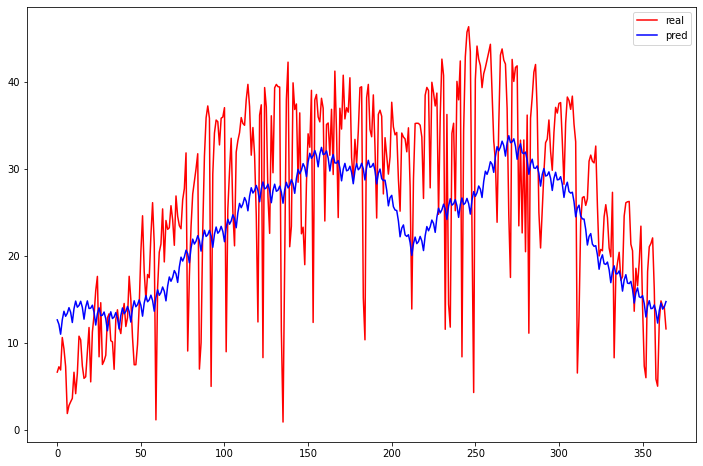

In [49]:
plt.figure(figsize = (12, 8))
plt.plot(label, color = 'red')
plt.plot(pred, color = 'blue')
plt.legend(['real', 'pred'])
plt.show()


In [43]:
label

0       6.618
1       7.230
2       6.860
3      10.598
4       9.292
        ...  
360    12.504
361    14.814
362    14.198
363    14.054
364    11.592
Name: y, Length: 365, dtype: float64

In [46]:
pred.index = range(365)